In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import shutil
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam

/home/svetlana/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from PIL import Image


In [17]:
# def create_data_path(base_path,input_path):
#     try:
#         os.makedirs(os.path.join(base_path,'data'))
#         os.makedirs(os.path.join(base_path, 'data/0'))
#         os.makedirs(os.path.join(base_path, 'data/1'))
#     except:
#         print("Greska pri kreiranju direktorijuma")
        
#     list_dir=glob.glob(os.path.join(input_path,'*'))
#    # data = np.array([])
#    # y = np.array([])
#     for id in list_dir:
#         list_file_0=glob.glob(os.path.join(id,'0/*'))
#         list_file_1= glob.glob(os.path.join(id, '1/*'))
#         for file_0 in list_file_0:
#             src_path = file_0
#             dst_path = os.path.join(os.path.join(base_path, 'data/0'), os.path.basename(file_0))
#             shutil.copy(src_path, dst_path)
#             #np.append(data, np.array(Image.open(file_0)))
#             #np.append(y, 0)
            
#         for file_1 in list_file_1:
#             src_path = file_1
#             dst_path = os.path.join(os.path.join(base_path, 'data/1'), os.path.basename(file_1))
#             shutil.copy(src_path, dst_path)
#             #np.append(data, np.array(Image.open(file_1)))
#             #np.append(y, 1)


In [18]:
#create_data_path('../kolekcija/','../archive')

In [20]:
list_dir_0=glob.glob(os.path.join('../kolekcija/data/0/','*'))


In [21]:
#spahe of images
img = Image.open(list_dir_0[0])
print("Shape of images: (",img.height,',', img.width,")")
channel = 3


Shape of images: ( 50 , 50 )


In [23]:
data0 = np.ndarray((2000, img.height, img.width, channel), dtype=np.float32)

#data0 = np.ndarray(shape=(len(list_dir_0), img.height, img.width, channel), dtype=np.float32)
i=0
for fname in list_dir_0[:2000]:
    curr_img = Image.open(fname)
    # if curr_img size is (50, 50)
    if curr_img.size == img.size:
        data0[i] = curr_img
        i+=1
        
    


In [25]:
array_dir_0 = np.array(list_dir_0[:2000])

In [26]:
y0 = dict(zip(array_dir_0, np.array([0 for i in array_dir_0[:2000]])))


In [27]:
list_dir_1 = glob.glob(os.path.join('../kolekcija/data/1', '*'))

In [28]:
img = Image.open(list_dir_1[0])
print("Shape of images: (",img.height,',', img.width,")")
channel = 3


Shape of images: ( 50 , 50 )


In [30]:
data1 = np.ndarray((2000, img.height, img.width, channel), dtype=np.float32)

#data1 = np.ndarray(shape=(len(list_dir_1), img.height, img.width, channel), dtype=np.float32)
i=0
for fname in list_dir_1[:2000]:
    curr_img = Image.open(fname)
    # if curr_img size is (50, 50)
    if curr_img.size == img.size:
        data1[i] = curr_img
        i+=1
        

In [31]:
array_dir_1 = np.array(list_dir_1[:2000])

In [32]:
y1 = dict(zip(array_dir_1, np.array([1 for i in array_dir_1[:2000]])))


In [33]:
print("Ukupan broj podataka ", len(y0)+len(y1))

Ukupan broj podataka  4000


In [34]:
print("Broj podataka sa pozitivnim IDC-om ", len(y1))
print("Broj podataka sa negativnim IDC-om ", len(y0))

Broj podataka sa pozitivnim IDC-om  2000
Broj podataka sa negativnim IDC-om  2000


In [35]:
# data_0_1 = np.concatenate((data0, data1))
# len(data_0_1)

In [36]:
#Y = np.concatenate((y0, y1))

In [37]:
np.save('../kolekcija/data0.npy', data0)
#np.save('../kolekcija/Y.npy', Y)


In [38]:
np.save('../kolekcija/data1.npy', data1)

In [2]:
#ucitavanje podataka iz npy fajla

np.load.__defaults__=(None, True, True, 'ASCII')
X0 = np.load('../kolekcija/data0.npy')
np.load.__defaults__=(None, False, True, 'ASCII')



In [3]:
np.load.__defaults__=(None, True, True, 'ASCII')
X1 = np.load('../kolekcija/data1.npy')
np.load.__defaults__=(None, False, True, 'ASCII')


In [4]:
print(X1.shape)

(2000, 50, 50, 3)


(4000, 50, 50, 3)


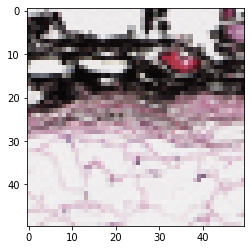

In [32]:
X = np.concatenate((X0, X1))
print(X.shape)
plt.imshow(X[0]/255)

In [33]:
y0 = np.zeros(shape=(2000,1))
y1 = np.ones(shape=(2000,1))
Y = np.concatenate((y0, y1))

In [34]:
#iscrtavanje i analiza nekih podataka
# shuffle data
perm_array = np.arange(len(X))
np.random.shuffle(perm_array)
x_images = X[perm_array]
y_images = Y[perm_array]

print('x_images.shape =', x_images.shape)
print('y_images.shape =', y_images.shape)


x_images.shape = (4000, 50, 50, 3)
y_images.shape = (4000, 1)


In [35]:
# multi_array=np.ones((7000,50,50,3))

# multi_array.shape

# import tensorflow as tf

# for i in range(50):
#     print(x_images[i].shape)
#     #For clarificatlin let's multiply each distict "image" with the number i to easily undestand the structure of the result...
#     multi_array[i,:]=x_images[i]
#     #...but naturally the "one_liketensor" is something special data ... thus there is need to take this information directly from this source

# #And next let's print the result
# #print(multi_array)

# #And let's transform that to tensor-format
# multi_array_as_tensor=tf.constant(multi_array)

# #And ... tadaa ... you have the material in the preferred format:
# print("Shape of the result is: ",multi_array_as_tensor.shape)


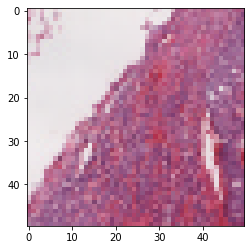

In [36]:
x_images/=255
plt.imshow(x_images[0])